In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import IPython.display as display
from itertools import combinations

In [44]:
df1 = pd.read_csv('/kaggle/input/arketing-campaign/marketing_campaign.csv', sep = ';')
df1['Age'] = 2014 - df1['Year_Birth']
df2 = df1.drop(columns = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_Revenue', 'Z_CostContact'])
df2['Marital_Status'] = df2['Marital_Status'].replace({'Divorced' : 'Single', 'Widow' : 'Single',
                                                      'Alone' : 'Single', 'Together' : 'Couple', 
                                                    'Married':'Couple'})
df2['Education'] = df2['Education'].replace({'PhD' : 'Not Basic', 'Master' : 'Not Basic', 
                                             'Graduation' : 'Not Basic', '2n Cycle' : 'Not Basic'})
df2 = df2[(df2['Marital_Status'] != 'Absurd') & (df2['Marital_Status'] != 'YOLO')]
df2 = df2[df2['Income'] < 180000]

def convert_to_categorical(df, col):
    bins = np.linspace( df[col].min(), df[col].max() , 6)
    labels = [ f'{int(bins[i])} ~ {int(bins[i+1])}' for i in range(len(bins) - 1) ]
    df[col] = pd.cut(df[col] ,bins = bins, labels = labels, right = False, include_lowest = True)
    return df[col]

for col in ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 
            'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Income']:
    df2[col] = convert_to_categorical(df2, col)

In [45]:
df2

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Not Basic,Single,33863 ~ 65996,0,0,58,597 ~ 895,79 ~ 119,345 ~ 690,155 ~ 207,...,2 ~ 5,4 ~ 8,0,0,0,0,0,0,1,57
1,Not Basic,Single,33863 ~ 65996,1,1,38,0 ~ 298,0 ~ 39,0 ~ 345,0 ~ 51,...,0 ~ 2,4 ~ 8,0,0,0,0,0,0,0,60
2,Not Basic,Couple,65996 ~ 98130,0,0,26,298 ~ 597,39 ~ 79,0 ~ 345,103 ~ 155,...,7 ~ 10,4 ~ 8,0,0,0,0,0,0,0,49
3,Not Basic,Couple,1730 ~ 33863,1,0,26,0 ~ 298,0 ~ 39,0 ~ 345,0 ~ 51,...,2 ~ 5,4 ~ 8,0,0,0,0,0,0,0,30
4,Not Basic,Couple,33863 ~ 65996,1,0,94,0 ~ 298,39 ~ 79,0 ~ 345,0 ~ 51,...,5 ~ 7,4 ~ 8,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Not Basic,Couple,33863 ~ 65996,0,1,46,597 ~ 895,39 ~ 79,0 ~ 345,0 ~ 51,...,2 ~ 5,4 ~ 8,0,0,0,0,0,0,0,47
2236,Not Basic,Couple,33863 ~ 65996,2,1,56,298 ~ 597,0 ~ 39,0 ~ 345,0 ~ 51,...,2 ~ 5,4 ~ 8,0,0,0,1,0,0,0,68
2237,Not Basic,Single,33863 ~ 65996,0,0,91,895 ~ 1194,39 ~ 79,0 ~ 345,0 ~ 51,...,NaN,4 ~ 8,0,1,0,0,0,0,0,33
2238,Not Basic,Couple,65996 ~ 98130,0,1,8,298 ~ 597,0 ~ 39,0 ~ 345,51 ~ 103,...,7 ~ 10,0 ~ 4,0,0,0,0,0,0,0,58


In [49]:
var_1 = ['Education','Income', 'Kidhome', 'Teenhome', 
       'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth' ]

target = 'AcceptedCmp3'

df_target = pd.DataFrame()


for i in range(4, len(var_1) + 1):
    combs = combinations(var_1, i) 
    for comb in combs:
        grouped = df2.groupby(list(comb), observed = True)[target].agg(['size', 'mean']).reset_index()
        grouped = grouped[ (grouped['size'] >= 30) & (grouped['mean'] >= 0.3) ]

        if not grouped.empty:
            df_target = pd.concat([df_target, grouped], ignore_index=True)
 

In [28]:
df_target = pd.read_csv('/kaggle/input/df-target/camp1.csv')


In [51]:
df_target.sort_values(by = 'mean', ascending = False)

,Education,Income,MntWines,NumStorePurchases,size,mean,NumWebPurchases,NumCatalogPurchases,Kidhome,MntSweetProducts,MntGoldProds,MntMeatProducts,NumWebVisitsMonth,Teenhome,MntFruits,NumDealsPurchases,MntFishProducts
986,NaN,1730 ~ 33863,NaN,0 ~ 2,34,0.411765,NaN,NaN,1.0,NaN,NaN,0 ~ 345,4 ~ 8,0.0,NaN,0 ~ 3,0 ~ 51
1895,NaN,1730 ~ 33863,NaN,0 ~ 2,34,0.411765,0 ~ 5,0 ~ 5,1.0,NaN,NaN,NaN,4 ~ 8,0.0,0 ~ 39,0 ~ 3,NaN
1892,NaN,1730 ~ 33863,NaN,0 ~ 2,34,0.411765,0 ~ 5,NaN,1.0,NaN,0 ~ 64,NaN,4 ~ 8,0.0,0 ~ 39,0 ~ 3,NaN
3535,NaN,1730 ~ 33863,0 ~ 298,0 ~ 2,34,0.411765,NaN,0 ~ 5,1.0,NaN,0 ~ 64,0 ~ 345,4 ~ 8,0.0,NaN,0 ~ 3,0 ~ 51
3534,NaN,1730 ~ 33863,0 ~ 298,0 ~ 2,34,0.411765,0 ~ 5,NaN,1.0,NaN,0 ~ 64,0 ~ 345,4 ~ 8,0.0,NaN,0 ~ 3,0 ~ 51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Not Basic,NaN,NaN,NaN,30,0.300000,5 ~ 10,5 ~ 11,NaN,NaN,NaN,0 ~ 345,NaN,NaN,0 ~ 39,0 ~ 3,NaN
123,Not Basic,NaN,NaN,NaN,30,0.300000,NaN,5 ~ 11,NaN,0 ~ 52,NaN,0 ~ 345,NaN,NaN,NaN,0 ~ 3,0 ~ 51
198,NaN,33863 ~ 65996,NaN,NaN,30,0.300000,5 ~ 10,NaN,NaN,0 ~ 52,NaN,0 ~ 345,NaN,0.0,NaN,0 ~ 3,NaN
223,NaN,33863 ~ 65996,NaN,NaN,30,0.300000,5 ~ 10,0 ~ 5,NaN,0 ~ 52,NaN,NaN,8 ~ 12,NaN,NaN,3 ~ 6,NaN


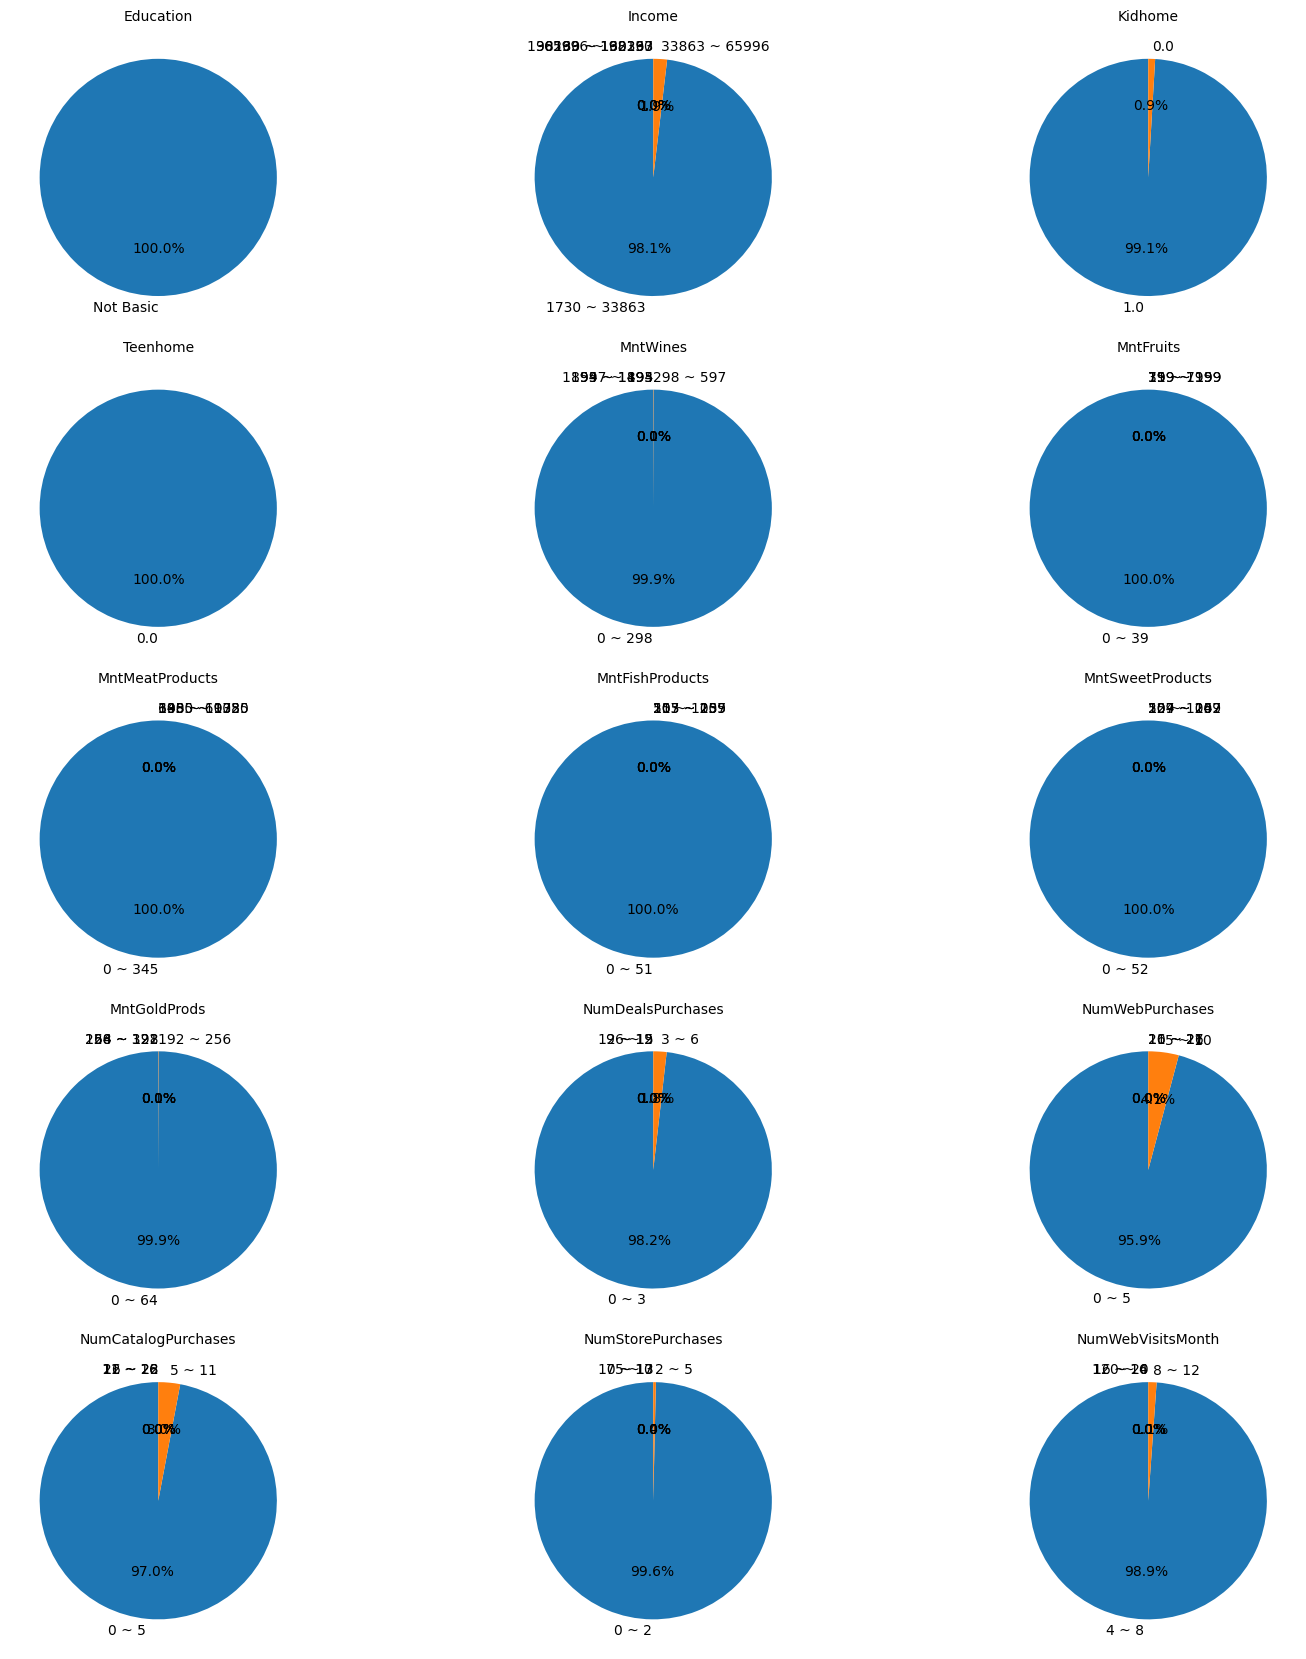

In [53]:
import matplotlib.pyplot as plt

# 데이터프레임의 열 목록
columns = df_target[var_1]

# 서브플롯 행과 열의 수
rows, cols = 6, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 20))  # 서브플롯 생성
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

# 열별로 파이 차트를 생성
for i, col in enumerate(columns):
    if i >= len(axes):  # 서브플롯이 더 이상 없으면 종료
        break
    
    # 데이터 분포 계산
    data = df_target[col].value_counts()
    
    # 파이 차트 생성
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col, fontsize=10)
    
# 빈 서브플롯 숨기기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 레이아웃 정리 및 표시
plt.tight_layout()
plt.show()


In [56]:
from scipy.stats import binomtest

p_value = binomtest(14, 34, 0.06, alternative = 'two-sided')
print(p_value)


BinomTestResult(k=14, n=34, alternative='two-sided', statistic=0.4117647058823529, pvalue=3.4557093410816137e-09)
